In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
path = "resources/telecom_cleaned.csv"
df = pd.read_csv(path)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00
5972,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30
5973,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5974,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15


In [9]:
X=df

In [10]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,72,24.10,1734.65,1,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0
1,0,44,88.15,3973.20,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0
2,1,38,74.95,2869.85,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,4,55.90,238.50,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,0,2,53.45,119.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [16]:
Y=df['MonthlyCharges']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
print(model.intercept_)

5.684341886080802e-14


In [24]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
SeniorCitizen,-2.898022e-14
tenure,-2.216090e-15
MonthlyCharges,1.000000e+00
TotalCharges,-5.309623e-18
gender_Male,-9.807673e-16
Partner_Yes,-1.625764e-15
Dependents_Yes,3.013554e-15
PhoneService_Yes,6.038034e-16
MultipleLines_No phone service,-5.385342e-16
MultipleLines_Yes,2.635495e-16


In [25]:
predictions = model.predict(X_test)
predictions

array([ 29.4 ,  20.9 , 113.05, ...,  21.05,  79.5 ,  70.25])

/Users/RachelChan/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MonthlyCharges'>

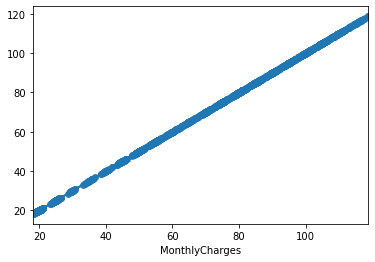

In [26]:
sns.regplot(y_test,predictions)

In [28]:
import statsmodels.api as sm
X_train_Sm=sm.add_constant(X_train)

X_train_Sm=sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:         MonthlyCharges   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.598e+31
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:41:13   Log-Likelihood:             1.0247e+05
No. Observations:                3585   AIC:                        -2.049e+05
Df Residuals:                    3561   BIC:                        -2.047e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [27]:
line = LinearRegression()
line.fit(X_train, y_train)


pred_line = line.predict(X_train)
mse = mean_squared_error(y_train, pred_line)
r2 = r2_score(y_train, pred_line)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 3.908437210191244e-27
R-squared (R2 ): 1.0


In [ ]:
#inverse_transform(y) <-- How to turn labels back
label = LabelEncoder()
df = pd.get_dummies(df)


In [ ]:
#Correlation matrix
corrMatrix = df.corr()
corrMatrix

In [ ]:
df_test=df[['SeniorCitizen', 'tenure', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes'
           , 'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_Yes',
           'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
           'StreamingMovies_Yes', 'Contract_Two year', 'PaperlessBilling_Yes']]
df_test

In [ ]:
corrMatrix = df_test.corr()
corrMatrix

In [ ]:
#Drop dependent columns
# df.drop(['MonthlyCharges', 'tenure', 'gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_No',
#             'PaperlessBilling_No']
# X = df.drop(['MonthlyCharges', 'tenure', 'gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_No',
#             'PaperlessBilling_No', 'MultipleLines_No', 'MultipleLines_No phone service', 'InternetService_No',
#             'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No', 
#             'OnlineBackup_No internet service', 'DeviceProtection_No', 'DeviceProtection_No internet service',
#             'TechSupport_No', 'TechSupport_No internet service', 'StreamingTV_No', 'StreamingTV_No internet service',
#             'StreamingMovies_No', 'StreamingMovies_No internet service', 'Contract_One year', 'Contract_Two year',
#             'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'], axis=1)

X = df_test

y = df ["MonthlyCharges"]

X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [ ]:
#Rachel's code
model=LinearRegression()

In [ ]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

In [ ]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [ ]:
# #DROPPING DeviceProtection_No internet service to test
# df3 = df2.drop(columns=['DeviceProtection_No internet service'])


In [ ]:
def calculate_vif(df):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = df.columns
    for i in range(0, x_var_names.shape[0]):
        y = df[x_var_names[i]]
        x = df[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

# X=df.drop(['Salary'],axis=1)
calculate_vif(X)

In [ ]:
sc =  StandardScaler()
X_scaler = sc.fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

X_train

# Linear Regression

In [ ]:
line = LinearRegression()
line.fit(X_train, y_train)


pred_line = line.predict(X_train)
mse = mean_squared_error(y_train, pred_line)
r2 = r2_score(y_train, pred_line)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

In [ ]:
line.score(X_test, y_test)